In [1]:
import pandas as pd
import urllib
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nick-edu/dmmldl/master/ForestFires.csv')
display(df)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [3]:
url = "https://raw.githubusercontent.com/nick-edu/dmmldl/master/ForestFiresColumns.txt"
file = urllib. request. urlopen(url)
expl_text = []
for line in file: 
    decoded_line = line.decode("utf-8")
    expl_text.append(decoded_line)
print(expl_text)

expl_dict = {}
for line in expl_text:
    
    try:
        key = re.search("(^\w+)\:\s(.*)",line).group(1)
        val = re.search("(^\w+)\:\s(.*)",line).group(2)
    except:
        continue
    expl_dict[key]  = val


print(expl_dict)

['Dataset with meteorological and other data as well as the burned area of forest fires in the northeast region of Portugal.\n', 'Source: https://archive.ics.uci.edu/ml/datasets/forest+fires\n', '\n', 'Columns:\n', 'X: x-axis spatial coordinate within the Montesinho park map: 1 to 9\n', 'Y: y-axis spatial coordinate within the Montesinho park map: 2 to 9\n', 'month: month of the year: "jan" to "dec" \n', 'day: day of the week: "mon" to "sun"\n', 'FFMC: FFMC index from the FWI system: 18.7 to 96.20\n', 'DMC: DMC index from the FWI system: 1.1 to 291.3 \n', 'DC: DC index from the FWI system: 7.9 to 860.6 \n', 'ISI: ISI index from the FWI system: 0.0 to 56.10\n', 'temp: temperature in Celsius degrees: 2.2 to 33.30\n', 'RH: relative humidity in %: 15.0 to 100\n', 'wind: wind speed in km/h: 0.40 to 9.40 \n', 'rain: outside rain in mm/m2 : 0.0 to 6.4 \n', 'area: the burned area of the forest (in ha): 0.00 to 1090.84 ']
{'Source': 'https://archive.ics.uci.edu/ml/datasets/forest+fires', 'Colum

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,3,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000
1,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000
2,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000
3,3,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000
4,3,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...
512,8,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.007
513,8,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.013
514,8,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498
515,8,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000


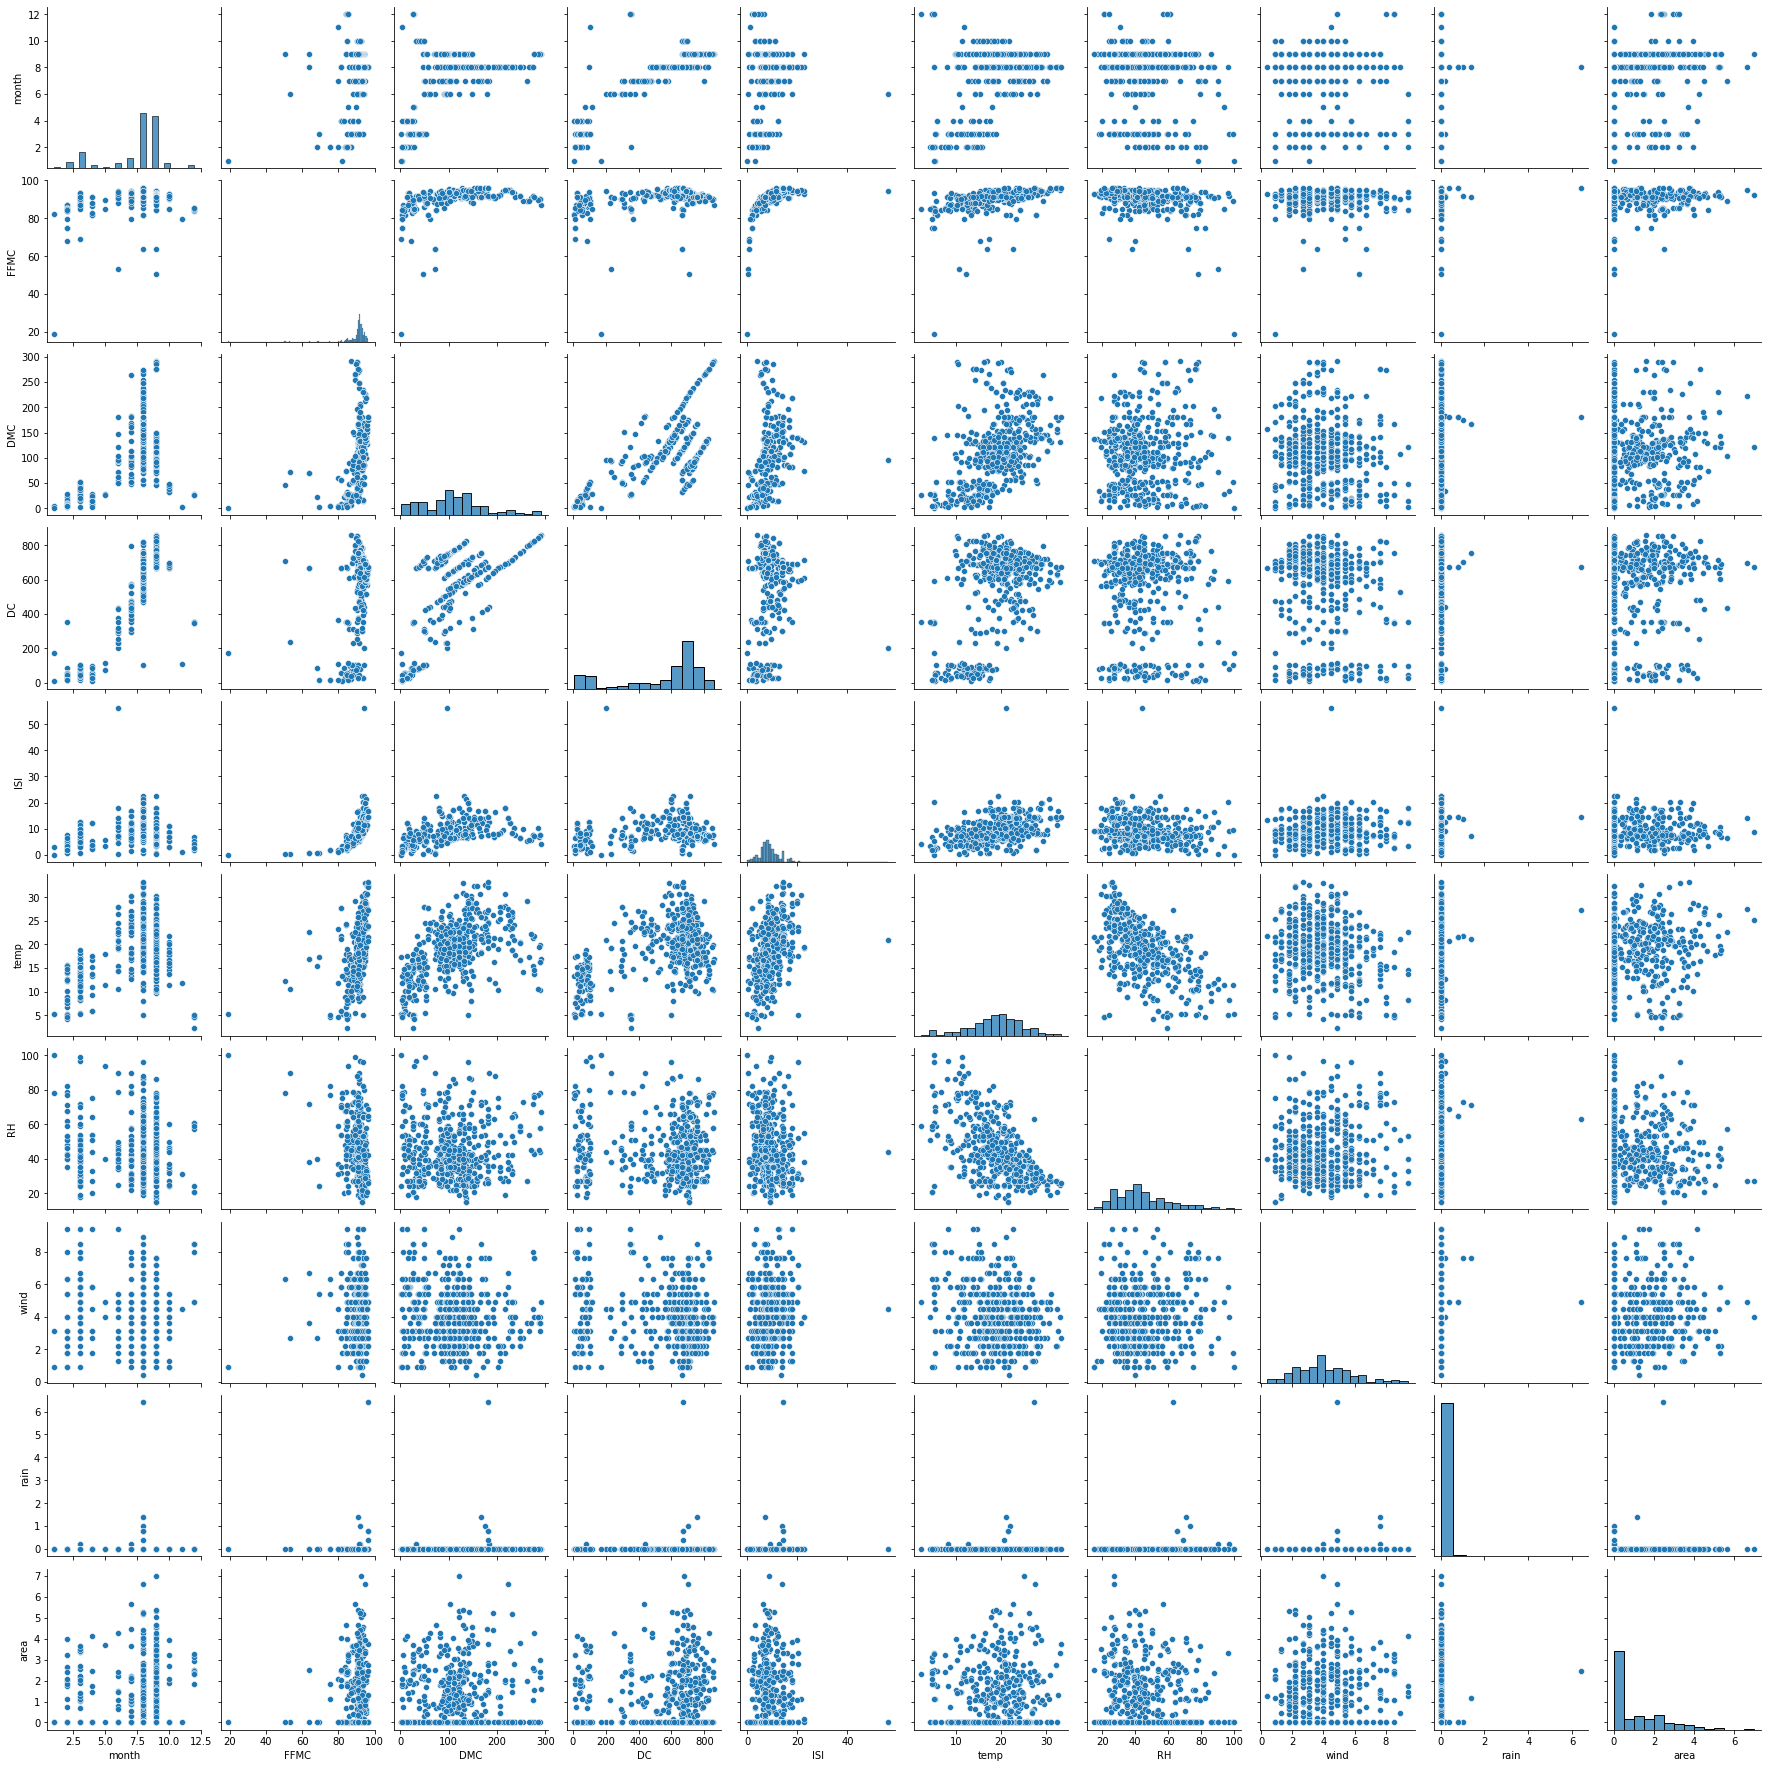

In [4]:
plot_col_drop = ['X','Y']
plot_df = (df
    .drop(plot_col_drop,axis=1))

#converting to log, rounding

area_vals = plot_df['area'] != 0
plot_df['area'] = (np
    .log(plot_df['area'] + 1)
    .round(decimals =3))


months = {'month':{"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}}
plot_df.replace(months,inplace = True)
display(plot_df)


#pairplot
sns.pairplot(plot_df)


,DMC,RH,area
0,0.086492,0.423529,0.000000
1,0.118194,0.211765,0.000000
2,0.146795,0.211765,0.000000
3,0.110958,0.964706,0.000000
4,0.172984,0.988235,0.000000
...,...,...,...
512,0.191592,0.200000,0.286875
513,0.191592,0.658824,0.573586
514,0.191592,0.647059,0.357102
515,0.499311,0.317647,0.000000


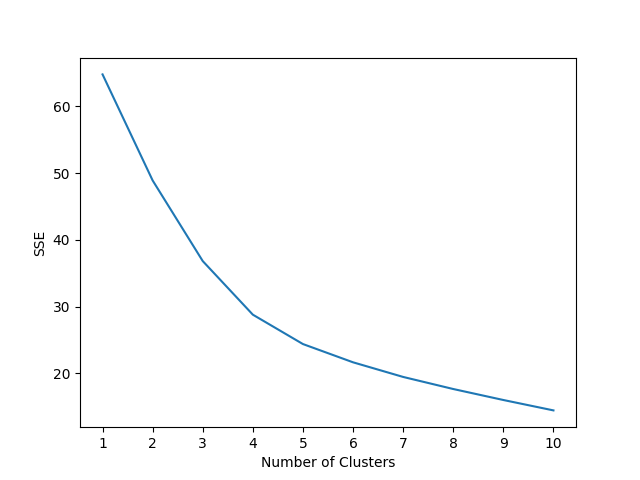

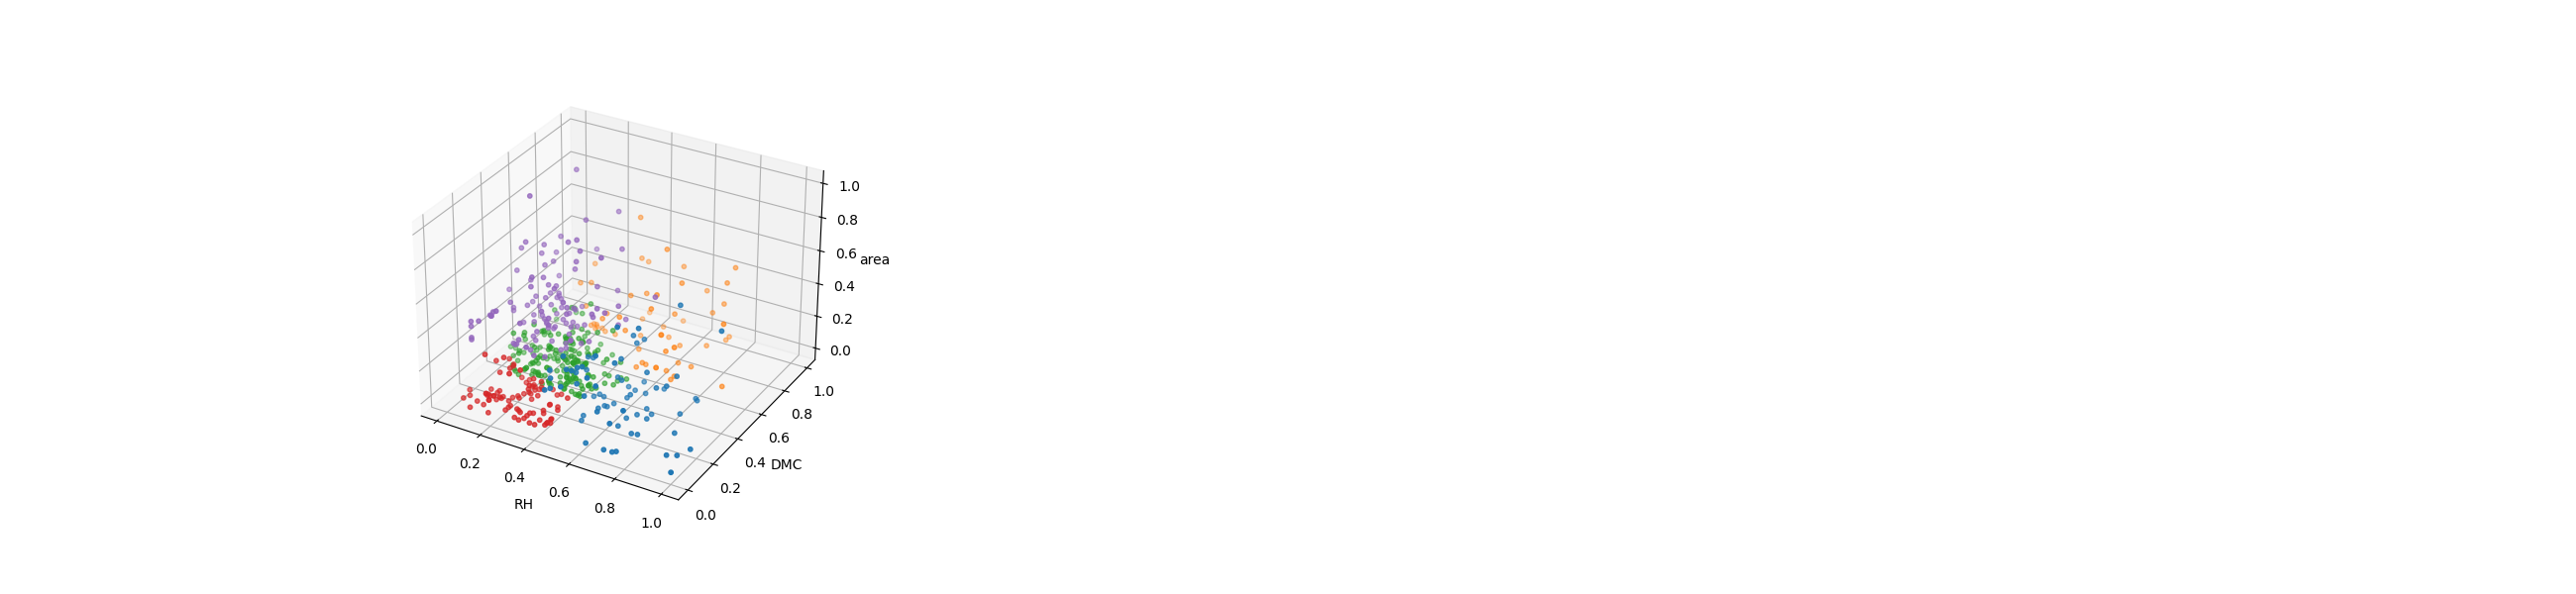

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import ipympl

%matplotlib widget
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']


#Select columns
cols = ['DMC', 'RH', 'area']

#assign chosen columns to X 
X = df.loc[:,cols]
X['area'] = np.log(X['area'] + 1)


#create pipeline 
pipe = Pipeline([("scaler",MinMaxScaler())])

X_scaled = pipe.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = cols)
display(X_scaled)


def plot_cluster(data, cluster_labels):
    fig, ax = plt.subplots(1, 1, figsize=(7,6))
    ax.set_xlim(min(data[:,0]), max(data[:,0]))
    ax.set_ylim(min(data[:,1]), max(data[:,1]))
    cluster_labels = pd.DataFrame(cluster_labels)
    colors = {-1:'tab:blue', 0:'tab:orange', 1:'tab:green', 2:'tab:red', 3:'tab:purple', 4:'tab:brown', 5:'tab:pink'}
    ax.scatter(data[:,0], data[:,1], s=20, lw=0, c = cluster_labels[0].map(colors))

    fig.tight_layout()
    plt.show()



kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 500,
     "random_state": 42, }

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

kmeans = KMeans(
     init="random",
     n_clusters=5,
     n_init=10,
     max_iter=300,
     random_state=42 )
X_scaled['cluster'] = kmeans.fit_predict(X_scaled)

X_scaled['c'] = X_scaled.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(X_scaled.RH, X_scaled.DMC, X_scaled.area, c = X_scaled.c, s=10)
ax.set_xlabel('RH')
ax.set_ylabel('DMC')
ax.set_zlabel('area')
plt.show()

#df_1 = X_scaled[['DMC','area']]
#df_2 = X_scaled[['DMC','RH']]
#df_3 = X_scaled[['RH','area']]
#DBSCAN_1 = DBSCAN(eps=20, min_samples=2).fit(df_1)
#DBSCAN_2 = DBSCAN(eps=20, min_samples=2).fit(df_2)
#DBSCAN_3 = DBSCAN(eps=20, min_samples=5).fit(df_3)

#plot_cluster(df_1.to_numpy(),DBSCAN_1.labels_)
#plot_cluster(df_2.to_numpy(),DBSCAN_2.labels_)
#plot_cluster(df_3.to_numpy(),DBSCAN_3.labels_)

In [6]:
X_scaled = X_scaled[X_scaled['area'] != 0]
#sns.heatmap(X_scaled.corr().round(decimals=2),annot=True)


df_test = df[df['area'] != 0].replace(months)
df_test['area'] = np.log(df_test['area']+1)
corr_matrix = df_test.corr().round(decimals =2)
print(corr_matrix)
sns.heatmap(df_test.corr().round(decimals = 2), annot = True)

display(df_test)

          X     Y  month  FFMC   DMC    DC   ISI  temp    RH  wind  rain  area
X      1.00  0.50  -0.15 -0.07 -0.10 -0.16 -0.05 -0.08  0.06  0.04  0.06  0.03
Y      0.50  1.00   0.04 -0.02  0.04 -0.03 -0.07  0.03 -0.04 -0.04  0.03 -0.01
month -0.15  0.04   1.00  0.23  0.37  0.80  0.12  0.24 -0.15 -0.05  0.01  0.03
FFMC  -0.07 -0.02   0.23  1.00  0.48  0.41  0.70  0.56 -0.29 -0.16  0.08 -0.03
DMC   -0.10  0.04   0.37  0.48  1.00  0.67  0.33  0.50  0.03 -0.14  0.08  0.04
DC    -0.16 -0.03   0.80  0.41  0.67  1.00  0.26  0.50 -0.08 -0.24  0.04 -0.02
ISI   -0.05 -0.07   0.12  0.70  0.33  0.26  1.00  0.47 -0.15  0.07  0.07 -0.09
temp  -0.08  0.03   0.24  0.56  0.50  0.50  0.47  1.00 -0.50 -0.32  0.08 -0.01
RH     0.06 -0.04  -0.15 -0.29  0.03 -0.08 -0.15 -0.50  1.00  0.14  0.10 -0.06
wind   0.04 -0.04  -0.05 -0.16 -0.14 -0.24  0.07 -0.32  0.14  1.00  0.05  0.05
rain   0.06  0.03   0.01  0.08  0.08  0.04  0.07  0.08  0.10  0.05  1.00  0.01
area   0.03 -0.01   0.03 -0.03  0.04 -0.02 -0.09 -0.

AttributeError: 'QuadMesh' object has no attribute 'do_3d_projection'

In [ ]:
def plot_cluster(data, cluster_labels):
    fig, ax = plt.subplots(1, 1, figsize=(7,6))
    ax.set_xlim(min(data[:,0]), max(data[:,0]))
    ax.set_ylim(min(data[:,1]), max(data[:,1]))
    cluster_labels = pd.DataFrame(cluster_labels)
    colors = {-1:'tab:blue', 0:'tab:orange', 1:'tab:green', 2:'tab:red', 3:'tab:purple', 4:'tab:brown', 5:'tab:pink'}
    ax.scatter(data[:,0], data[:,1], s=20, lw=0, c = cluster_labels[0].map(colors))

    fig.tight_layout()
    plt.show()

df_1 = X
